The following cell performs the initialisation of modules and data read-in,
unless this is changed, or the read-in data modified, it only needs to be run once each time the notebook is opened

In [34]:
#numpy and datetime
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

#function for converting the byte object version of the date and time into a datetime object
def bytetodatetime(x):
    return dt.datetime.strptime(x.decode(), '%Y-%m-%d %H:%M:%S')

datapath = 'C:/Users/tmk5/Downloads/' #this should be your own path containing the data file
datafile = 'Weather_all.csv' #name of the data file itself

#load the first two columns - date/time and the OAT sensor
#delimiter=',' specifies that the data are separated (delimited) by commas
#usecols=[0,1] indicates which columns to attempt to read
#converters={0:bytetodatetime} defines whether column data should be passed via any functions first...
#...in this case, column 0 is sent to bytetodatetime to do the data type conversion correctly
#skip_header=1 indicates how many rows to skip past at the top of the data file
#unpack=True indicates to store the columns as separate, 1D arrays, rather than the entire dataset as a single 2D array
#dDT, dTE = np.genfromtxt(datapath+datafile, delimiter=',', usecols=[0,1], converters={0:bytetodatetime}, skip_header=1, unpack=True)

#the following alternative version of the line reads in *all* columns from the file
dDT, dTE, dWU, dRT, dWK, dWR, dWT, dWG, dWS, dWD, dWV, dTI, dFI, dTX, dFX = np.genfromtxt(datapath+datafile, delimiter=',', converters={0:bytetodatetime}, skip_header=1, unpack=True)

The following cell shows a quick check of the data read in above

In [7]:
print(f'Read in {len(dDT)} dates and times, earliest is {np.min(dDT)} and latest is {np.max(dDT)}, duration is {np.max(dDT) - np.min(dDT)}')
print(f'Read in {len(dTE)} OATs, lowest is {np.min(dTE):0.2f}°C, highest is {np.max(dTE):0.2f}°C, mean is {np.mean(dTE):0.2f}°C, median is {np.median(dTE):0.2f}°C')

Read in 684568 dates and times, earliest is 2015-06-22 10:05:00 and latest is 2022-02-21 10:55:00, duration is 2436 days, 0:50:00
Read in 684568 OATs, lowest is -9.28°C, highest is 56.82°C, mean is 10.81°C, median is 10.43°C


The following command is an example of replacing all of the placeholder numerical values (-99999.0) with np.nan to make the data easier to work with for matplotlib

In [42]:
dTX[dTX < -99998] = np.nan

The following cell produces a simple graph of all OAT readings over time, this uses only the default settings for a basic plot

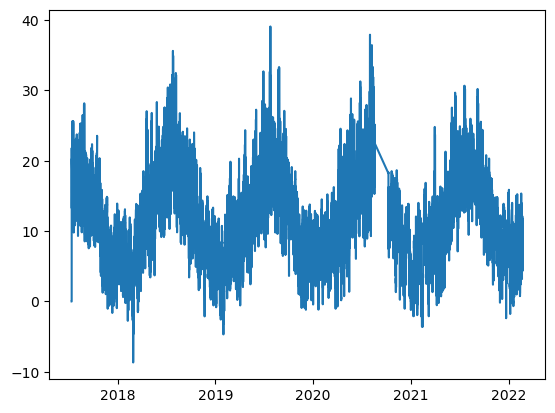

In [43]:
plt.plot(dDT,dTX)
plt.show()

The following example is a more elaborate version of the same data

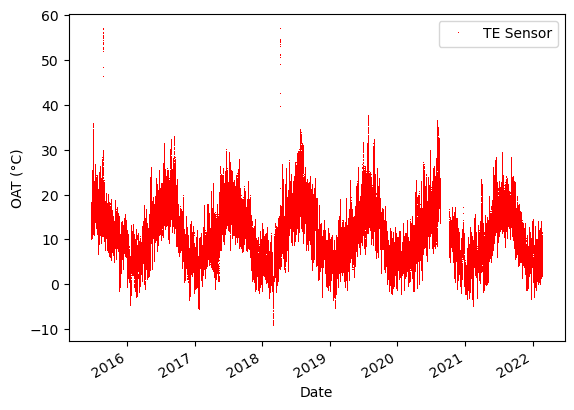

In [40]:
#plot the data series, arguments are x data, y data, the "fmt" sequence (in this case red "r" pixels ",") and a label to notate the series for if a legend/etc. is used
plt.plot(dDT,dTE,'r,',label='TE Sensor')
#plt.plot(dDT,dTX,'r,',label='TX Sensor') #TX sensor, if read in, with anomalous data

plt.legend() #adds a legend (superfluous here, with only one data series)
#simple axis labels
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.gcf().autofmt_xdate() #attempts to automatically tidy up datetime axes
plt.show()

The following is one approach to selecting a particular range of dates to plot OAT. Note that the original data is not modified; we are just selecting a subset at the time of plotting and using that. Modifying source data is potentially fragile as sequential runs may then be working on different data

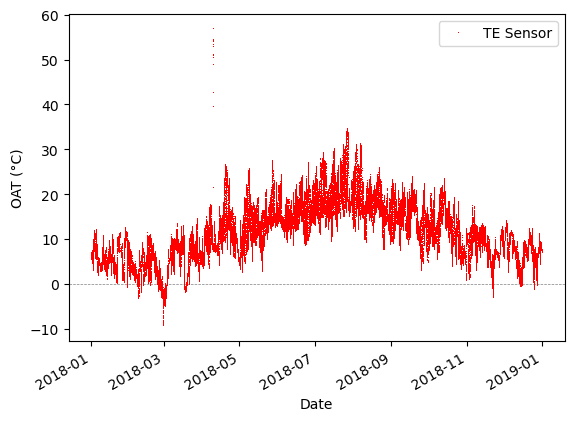

In [27]:
date_selection = np.logical_and(dDT >= dt.datetime(2018,1,1), dDT < dt.datetime(2019,1,1))

#add a thin (linewidth=0.5), grey (colour='grey') dashed (linestyle='dashed') line at 0°C
plt.axhline(0,color='grey',linestyle='dashed', linewidth=0.5)
#plot the data matching the selection only
plt.plot(dDT[date_selection],dTE[date_selection],'r,',label='TE Sensor')
#additional plotting commands as before for tidying up plot elements
plt.legend()
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.gcf().autofmt_xdate()
plt.show()

Of note in the previous plot are some outlier points approaching 60°C. These are likely anomalous. The following example trims the most egregious ones.

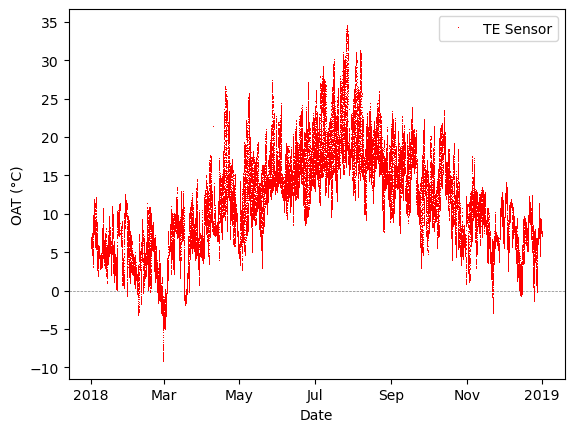

In [32]:
#for alternative date formatting
import matplotlib.dates as mdates

date_selection = np.logical_and(dDT >= dt.datetime(2018,1,1), dDT < dt.datetime(2019,1,1))
tem_selection = np.logical_and(dTE >= -20, dTE < 35)
all_selection = np.logical_and.reduce((date_selection,tem_selection))

#add a thin (linewidth=0.5), grey (colour='grey') dashed (linestyle='dashed') line at 0°C
plt.axhline(0,color='grey',linestyle='dashed', linewidth=0.5)
#plot the data matching the selection only
plt.plot(dDT[all_selection],dTE[all_selection],'r,',label='TE Sensor')
#additional plotting commands as before for tidying up plot elements
plt.legend()
plt.xlabel('Date')
plt.ylabel('OAT (°C)')
plt.yticks(np.arange(-10,36,5))

#An alternative formatting approach for the dates, see https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
plt.gca().xaxis.set_major_formatter(mdates.ConciseDateFormatter(plt.gca().xaxis.get_major_locator()))
plt.show()